# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [1]:
options(repr.plot.width=4, repr.plot.height=4) # change these setting to plot larger figures

## A first example - simple linear regression

we make repeated measurement of an observable Y as a function of X. You might think of a calibration curve where you measure the transmitted intensity as a function of the concentration of a solution.

### create data and visualize it

In [45]:
#rm(list=ls(all=TRUE)) # we clear the variable space

N <- 20 # we define the number of observations

# we create a fake dataset using a quadratic
#equation and adding some noise
# first create a vector of x repeated rep times
rep <- 2 # number of replicates
X <- rep(seq(from=43, to=96, length.out=N),rep)
# then create the Y vector according to the equation:
Y <- (0.075 * X + -1.874 + 0.01* X^2)
# create some noise
noise <-runif(length(Y), -1, 1) 
# add some noise to Y
Y <- Y + 1*noise


we take a look to the data that we just created.

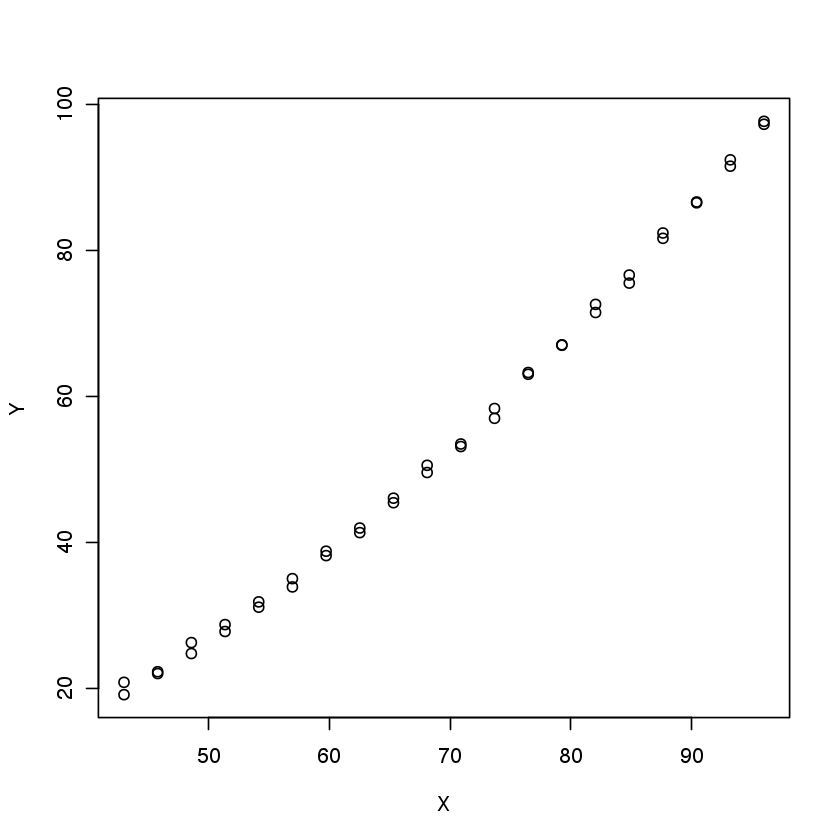

In [10]:
plot(X,Y)

In order to prepare a nice dataset for R we need to sort the data.

In [46]:
x_sorted <- sort(X,index.return=TRUE)
x <-x_sorted$x
y <- Y[x_sorted$ix]

and now we can create a data.frame with columns x,y and $x^2$. 

<span style="background-color: #DDEBF6">consider data.frame is equivalent to an excel spreadsheet, with columns headers, and data of the same length, however data could be of different kind, such as strings, numbers (numeric), factors, etc.</span>

In [47]:
data <- data.frame(x=x, y=y, x2=x^2)

to access the data within the data frame, use:

In [48]:
x_sorted$ix

[1]  1 21  2 22  3 23  4 24  5 25  6 26  7 27  8 28  9 29 10 30 11 31 12 32 13
[26] 33 14 34 15 35 16 36 17 37 18 38 19 39 20 40

In [70]:
data$y

[1] 20.10071 20.77956 21.74781 21.82683 24.50450 25.27103 27.51380 29.04687
 [9] 31.75233 30.97315 34.55355 34.46610 37.42354 37.48243 41.60839 41.60833
[17] 46.48510 45.89079 50.43973 49.27566 53.53409 54.17090 57.59836 58.71346
[25] 63.31894 62.45006 67.48261 66.94933 72.20476 72.50020 75.87729 77.29939
[33] 81.73020 81.99194 86.02835 86.08143 92.21610 91.45449 97.74829 97.85824

In [69]:
data['x'][data['y']>20.10071]

[1] 1849.000 2096.676 2096.676 2359.914 2359.914 2638.715 2638.715 2933.078
 [9] 2933.078 3243.003 3243.003 3568.490 3568.490 3909.540 3909.540 4266.152
[17] 4266.152 4638.327 4638.327 5026.064 5026.064 5429.363 5429.363 5848.224
[25] 5848.224 6282.648 6282.648 6732.634 6732.634 7198.183 7198.183 7679.294
[33] 7679.294 8175.967 8175.967 8688.202 8688.202 9216.000 9216.000

### linear model with ```lm()```

Now that we have defined a ```data.frame``` we can use it as input into most pre-built functions of R. Here we would like to test a simple linear regression. Therefore we use the ```lm()``` function and store the results in the ```fit.lm``` object. The linear model function accept a data.frame as input (here data) and allows you to define a model, in this case the function $y=ax$. <mark>Therefore it is important to define your data.frame properly so that lm will find the $x$ and $y$ columns in data.</mark>

In [26]:
fit.lm = lm(y ~ x, data=data) 

In [27]:
names(fit.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

At this stage we can have a look to the coefficient found, in this case of a linear model

In [28]:
# have a look to the coefficients
fit.lm$coefficients

(Intercept)           x 
 -47.827022    1.468756

You find a lot of information about your optimization by using the ```summary()``` function of R. It allows you to get some information about any object.

In [29]:
summary(fit.lm)


Call:
lm(formula = y ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4064 -1.7802 -0.6968  1.5644  5.4938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.82702    1.68307  -28.42   <2e-16 ***
x             1.46876    0.02359   62.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.4 on 38 degrees of freedom
Multiple R-squared:  0.9903,	Adjusted R-squared:   0.99 
F-statistic:  3875 on 1 and 38 DF,  p-value: < 2.2e-16


In the case you need to access one of the data shown here to use it further in your script, you can find the name of the objects displayed by ```summary()```

In [30]:
names(summary(fit.lm))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

So if you want to use the $r^2$ coefficient you can use the following command.

In [31]:
round(summary(fit.lm)$r.squared,3)

[1] 0.99

Maybe you want a nice picture of your data and the regression line.

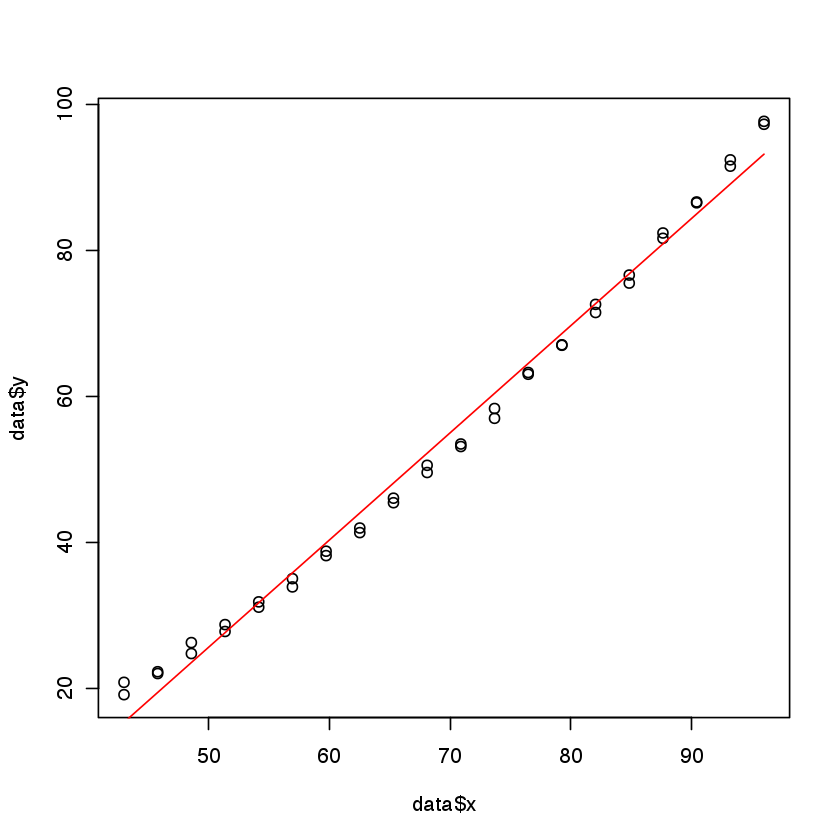

In [42]:
plot(data$x,data$y); lines(data$x, fitted(fit.lm), col=2)

If you want more control on what you do, you can display the regression by ploting a line that crosses 0 at "intercept" and with a slope of "x".

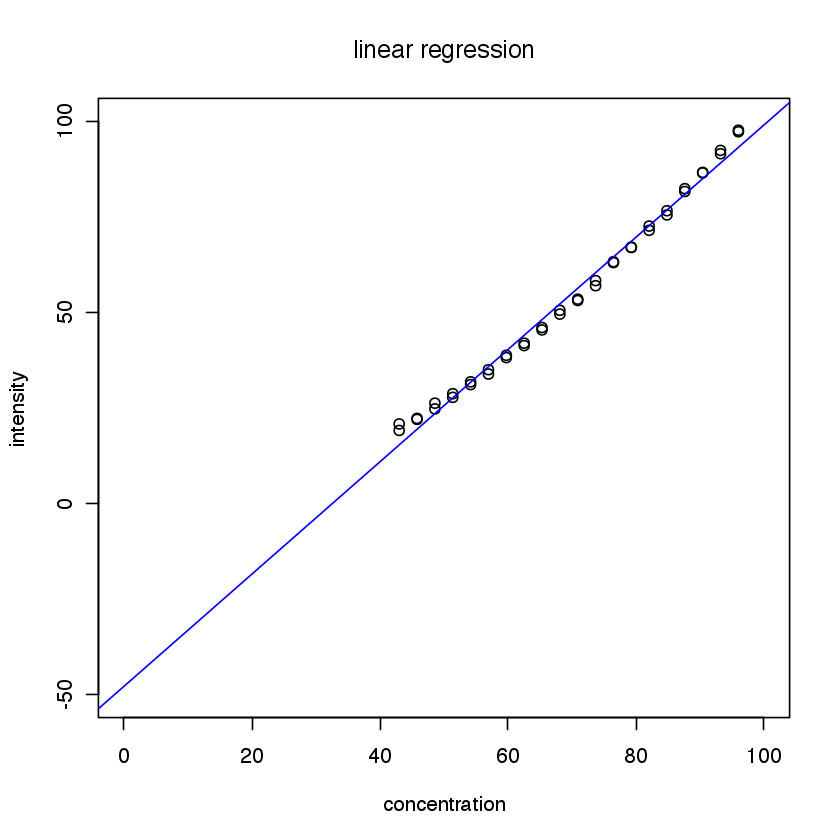

In [43]:
plot(data$x,data$y,main="linear regression",ylab="intensity",xlab="concentration",ylim=c(-50,100),xlim=c(0,100));
abline(fit.lm$coefficients[1],fit.lm$coefficients[2],col="blue")

You may have noticed that the data look to have some quadratic component (that we included intentionally at the beginning). You might want to see how good it fits if you use a quadratic function to fit your data.

[1] "the coefficient $r^2$ =  0.999"

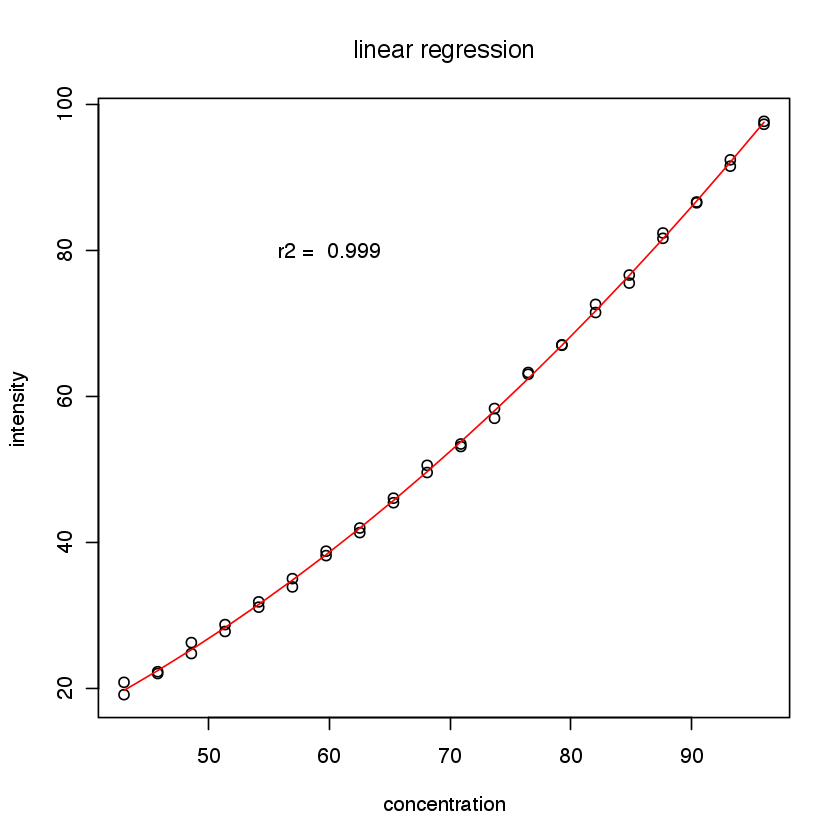

In [44]:
fit.lm = lm(y ~ x + x2, data=data)
plot(data$x,data$y, main="linear regression",ylab="intensity",xlab="concentration")
lines(data$x, fitted(fit.lm), col=2)
paste("the coefficient $r^2$ = ",round(summary(fit.lm)$r.squared,3))
text(60,80,paste("r2 = ",round(summary(fit.lm)$r.squared,3)))

## Experimental design

### linear regression
Use the data of Table 2.2 in Brereton, R. G. (2003). Chemometrics. Technometrics. Chichester, UK: John Wiley & Sons, Ltd. http://doi.org/10.1002/0470863242

Or import the table from the dataset section provided in this course.

#### import dataset

In [1362]:
data <- read.csv("./datasets/table2.2.csv")

Warning message:
In read.table(file = file, header = header, sep = sep, quote = quote, : incomplete final line found by readTableHeader on './datasets/table2.2.csv'

In [1363]:
data

,X...q,q,q.1,q.2,q.3,q.4,q.5,q.6,q.7,q.8
1,1,1,2,3,3,4,4,5,6,6
2,3.803,3.276,5.181,6.948,8.762,10.672,8.266,13.032,15.021,16.426
3,4.797,3.878,6.342,9.186,10.136,12.257,13.252,14.656,17.681,15.071


As you may notice, the data are not in the way we want. We would like to have two columns and we also would like the index of the row to be correct. We can solve this readily.


In [1364]:
data <- t(data) # we transpose the data

In [1365]:
rownames(data) <- seq(1,10)
colnames(data) <- c("conc","A","B")

In [1366]:
data

,conc,A,B
1,1.000,3.803,4.797
2,1.000,3.276,3.878
3,2.000,5.181,6.342
4,3.000,6.948,9.186
5,3.000,8.762,10.136
6,4.000,10.672,12.257
7,4.000,8.266,13.252
8,5.000,13.032,14.656
9,6.000,15.021,17.681
10,6.000,16.426,15.071


<mark>Although the table looks good there is a problem **may be** a problem with it. R sees each data in the table as characters and not as number. This means that we cannot use these data because they are not "numbers". We should change this. It is done very simply, but it is sometime annoying because it is not something we are used to think of. In order to "see" what R "sees", use the following command.</mark>

In [1367]:
is(data[1])
data[,1]

[1] "numeric" "vector"

1  2  3  4  5  6  7  8  9 10 
 1  1  2  3  3  4  4  5  6  6

Putting this altogether in something nicer, it gives:

In [75]:
remove(data)
data <- t(read.csv2("./datasets/table2.2.csv",header=TRUE,sep=",",dec="."))
rownames(data) <- seq(1:10)
data <- data.frame("conc"=as.factor(data[,1]), "A"=data[,2],"B"=data[,3])
data

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on './datasets/table2.2.csv'”

conc,A,B
1,3.803,4.797
1,3.276,3.878
2,5.181,6.342
3,6.948,9.186
3,8.762,10.136
4,10.672,12.257
4,8.266,13.252
5,13.032,14.656
6,15.021,17.681
6,16.426,15.071


#### Analysis of variance (ANOVA)

In order to estimate the quality of our regression we perform an analysis of variance. Here we will perform this analysis step by step as described in Chapter 2 of Brereton, R. G. (2003). Chemometrics. Technometrics. Chichester, UK: John Wiley & Sons, Ltd. http://doi.org/10.1002/0470863242

One of the most important feature of ANOVA is to compare the lack of fit to the replicate error. The error on replicate gives a estimation of the experimental error of the data, while the lack of fit gives an estimation of how good is our model for our data.

##### with intercept
We first find duplicated data in our table

In [76]:
duplicated(data[,1])


[1] FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE

In [77]:
Rep <- duplicated(data$conc) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
P <- 2 # if our model is y = ax + b
# find out the degree of freedom for our experiment
D <- N - P - R
D

[1] 4

In [78]:
R
N

[1] 4

[1] 10

In [79]:
library(plyr) # this library helps a lot

meanRep <- aggregate(A ~ conc, data = data, mean) # this calculates the mean for all replicates

sumRep=0
sumRep2=0
for (i in seq(1,nrow(data))) {
    sumRep[i] <- meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] 
    sumRep2[i] <- ( meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] )^2
}
S_replicate <- sum(sumRep2) # R degrees of freedom
result <- data.frame("Sum Replicate"=S_replicate)
result

Sum.Replicate
5.665593


We can verify our result by computing the strait sum of the replicate that gives 0.

In [80]:
round(sum(sumRep),3)

[1] 0

Using the models proposed in Chapter 2 of Brereton, we can compute the sum of residuals, that is the sum of the difference between the experimental data and the predicted ones.

In [81]:
predicted <- 0.6113 + 2.4364 * as.numeric(data$conc)
S_residual <- sum( (data$A - predicted)^2 )
result["Sum Residual"] <- S_residual # N-P degrees of freedom (# or S_total - S_predicted)
result["Sum Residual"]

Sum Residual
8.371165


In [82]:
S_total <- sum( data$A^2 ) # N degrees of freedom 
result["Sum Total"] <- S_total; result["Sum Total"]

S_predicted <- sum( predicted^2 ) # P degrees of freedom
result["Sum Predicted"] <- S_predicted; result["Sum Predicted"]

Sum Total
1024.58


Sum Predicted
1016.208


In [83]:
S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
result["Sum Lack Of Fit"] <- S_lackOfFit; result["Sum Lack Of Fit"]
result["F"] <- (S_lackOfFit / D) / (S_replicate / R); result["F"]

Sum Lack Of Fit
2.705572


F
0.4775444


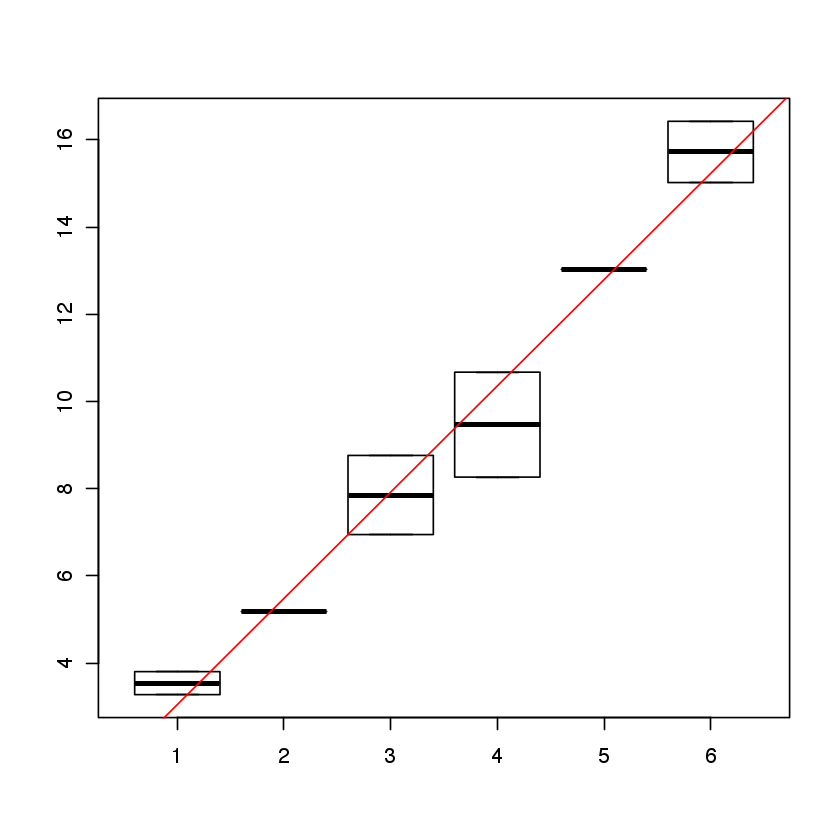

In [84]:
plot(data$conc, data$A)
abline(0.6113, 2.4364, col="red")

##### lack of fit

We can now put this in order and run the four cases, for both datasets A and B and with or without intercept. Table of comparison is shown below.

In [1396]:
#var.test((data$A - predicted),sumRep2[c(1,4,6,9)])
#sumRep2[c(1,4,6,9)]
#to be tested. Should be possible to use this command in this context.


	F test to compare two variances

data:  (data$A - predicted) and sumRep2[c(1, 4, 6, 9)]
F = 2.7536, num df = 9, denom df = 3, p-value = 0.4374
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1902585 13.9832395
sample estimates:
ratio of variances 
          2.753626 


[1] 0.06943225 0.82264900 1.44720900 0.49350625

In [1290]:
Rep <- duplicated(data$conc) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
P <- 2
D <- N - P - R
meanRep <- aggregate(A ~ conc, data = data, mean)
result <- data.frame("Number Replicate"=R)
result["Number of Data"] <- N
result["Number of Parameters"] <- P

sumRep=0
sumRep2=0
for (i in seq(1,nrow(data))) {
    sumRep[i] <- meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] 
    sumRep2[i] <- ( meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] )^2
}
S_replicate <- sum(sumRep2) # R degrees of freedom 
result["Sum Replicate"] <- S_replicate

predicted <- 0.6113 + 2.4364 * as.numeric(data$conc)
S_residual <- sum( (data$A - predicted)^2 ) # N-P degrees of freedom (# or S_total - S_predicted)
result["Sum Residual"] <- S_residual

S_total <- sum( data$A^2 ) # N degrees of freedom
result["Sum Total"] <- S_total

S_predicted <- sum( predicted^2 ) # P degrees of freedom
result["Sum Predicted"] <- S_predicted

S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
result["Sum Lack Of Fit"] <- S_lackOfFit

result["Mean Residuals"] <- S_residual / (N-P)
result["Mean Total"] <- S_total / N
result["Mean Predicted"] <- S_predicted / P
result["Mean Replicate"] <- S_replicate / R
result["Lack Of Fit"] <- S_lackOfFit / D
A2 <- t(result)

In [1291]:
Rep <- duplicated(data$conc) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
P <- 1
D <- N - P - R
meanRep <- aggregate(A ~ conc, data = data, mean)
result <- data.frame("Number Replicate"=R)
result["Number of Data"] <- N
result["Number of Parameters"] <- P

sumRep=0
sumRep2=0
for (i in seq(1,nrow(data))) {
    sumRep[i] <- meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] 
    sumRep2[i] <- ( meanRep$A[ meanRep$conc == data$conc[i] ] - data$A[i] )^2
}
S_replicate <- sum(sumRep2) # R degrees of freedom 
result["Sum Replicate"] <- S_replicate

predicted <- 2.576 * as.numeric(data$conc)
S_residual <- sum( (data$A - predicted)^2 ) # N-P degrees of freedom (# or S_total - S_predicted)
result["Sum Residual"] <- S_residual

S_total <- sum( data$A^2 ) # N degrees of freedom
result["Sum Total"] <- S_total

S_predicted <- sum( predicted^2 ) # P degrees of freedom
result["Sum Predicted"] <- S_predicted

S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
result["Sum Lack Of Fit"] <- S_lackOfFit

result["Mean Residuals"] <- S_residual / (N-P)
result["Mean Total"] <- S_total / N
result["Mean Predicted"] <- S_predicted / P
result["Mean Replicate"] <- S_replicate / R
result["Lack Of Fit"] <- S_lackOfFit / D
A1 <- t(result)

In [1292]:
Rep <- duplicated(data$conc) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
P <- 2
D <- N - P - R
meanRep <- aggregate(B ~ conc, data = data, mean)
result <- data.frame("Number Replicate"=R)
result["Number of Data"] <- N
result["Number of Parameters"] <- P

sumRep=0
sumRep2=0
for (i in seq(1,nrow(data))) {
    sumRep[i] <- meanRep$B[ meanRep$conc == data$conc[i] ] - data$B[i] 
    sumRep2[i] <- ( meanRep$B[ meanRep$conc == data$conc[i] ] - data$B[i] )^2
}
S_replicate <- sum(sumRep2) # R degrees of freedom 
result["Sum Replicate"] <- S_replicate

predicted <- 2.032 + 2.484 * as.numeric(data$conc)
S_residual <- sum( (data$B - predicted)^2 ) # N-P degrees of freedom (# or S_total - S_predicted)
result["Sum Residual"] <- S_residual

S_total <- sum( data$B^2 ) # N degrees of freedom
result["Sum Total"] <- S_total

S_predicted <- sum( predicted^2 ) # P degrees of freedom
result["Sum Predicted"] <- S_predicted

S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
result["Sum Lack Of Fit"] <- S_lackOfFit

result["Mean Residuals"] <- S_residual / (N-P)
result["Mean Total"] <- S_total / N
result["Mean Predicted"] <- S_predicted / P
result["Mean Replicate"] <- S_replicate / R
result["Lack Of Fit"] <- S_lackOfFit / D
B2 <- t(result)

In [1293]:
Rep <- duplicated(data$conc) # find replicates
R <- sum( Rep ) # enumerate replicates
N <- dim(data)[1] # find out dimension of data
P <- 1
D <- N - P - R
meanRep <- aggregate(B ~ conc, data = data, mean)
result <- data.frame("Number Replicate"=R)
result["Number of Data"] <- N
result["Number of Parameters"] <- P

sumRep=0
sumRep2=0
for (i in seq(1,nrow(data))) {
    sumRep[i] <- meanRep$B[ meanRep$conc == data$conc[i] ] - data$B[i] 
    sumRep2[i] <- ( meanRep$B[ meanRep$conc == data$conc[i] ] - data$B[i] )^2
}
S_replicate <- sum(sumRep2) # R degrees of freedom 
result["Sum Replicate"] <- S_replicate

predicted <- 2.948 * as.numeric(data$conc)
S_residual <- sum( (data$B - predicted)^2 ) # N-P degrees of freedom (# or S_total - S_predicted)
result["Sum Residual"] <- S_residual

S_total <- sum( data$B^2 ) # N degrees of freedom
result["Sum Total"] <- S_total

S_predicted <- sum( predicted^2 ) # P degrees of freedom
result["Sum Predicted"] <- S_predicted

S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
result["Sum Lack Of Fit"] <- S_lackOfFit

result["Mean Residuals"] <- S_residual / (N-P)
result["Mean Total"] <- S_total / N
result["Mean Predicted"] <- S_predicted / P
result["Mean Replicate"] <- S_replicate / R
result["Lack Of Fit"] <- S_lackOfFit / D
B1 <- t(result)

In [1294]:
tableOfResult1 <- data.frame(A1,A2,B1,B2)
tableOfResult1

,A1,A2,B1,B2
Number.Replicate,4,4,4,4
Number of Data,10,10,10,10
Number of Parameters,1,2,1,2
Sum Replicate,5.665593,5.665593,4.774593,4.774593
Sum Residual,9.116023,8.371165,15.472464,7.239920
Sum Total,1024.580,1024.580,1345.793,1345.793
Sum Predicted,1015.274,1016.208,1329.678,1338.664
Sum Lack Of Fit,3.450430,2.705572,10.697871,2.465327
Mean Residuals,1.012891,1.046396,1.719163,0.904990
Mean Total,102.4580,102.4580,134.5793,134.5793


<mark>Both datasets are similar. However, for the second set, excluding the intercept increase the lack of fit. It is important to note that it is not possible to judge the lack of fit other than by comparing it to the Mean Sum of Replicates. In all cases the LOF is smaller than the MSR, except for B1. The conclusion is that we need 2 parameters to best fit our data.</mark>

In [1326]:
# Brereton p.42
qf(0.95,5,4)  # this would be the F-ratio for 95% confidence.
# above this number we can conclude with 95% confidence that intercept is useful.
2.1395742/1.193648
0.6900860/1.416398
pf(1.792,5,4,lower.tail = TRUE)
pf(0.48721,5,4,lower.tail = TRUE)

[1] 6.256057

[1] 1.792467

[1] 0.4872119

[1] 0.7040839

[1] 0.2250842

So we can conclude with 70.4% of confidence that intercept is useful in the case of the B dataset. It is not possible to conclude in the case of the dataset A, since the value for F-ratio is very low.

##### programing a function

The way we performed the calculation above is not very efficient. We copy and paste 4 time the same code. If we want to make a modification we would have to propagate in all four pieces. In this case, a better practise consists in creating a funcion. If we are interested in more flexibility we can program a function to perform the calculation. This is done like this:

In [1295]:
lof <- function(x, y, fit.lm) {
    
    data=data.frame("x"=as.numeric(x), "y"=y)
    #fit.lm <- lm( y ~ x, data=data )
    
    Rep <- duplicated(data$x) # find replicates
    R <- sum(Rep) # enumerate replicates
    N <- dim(data)[1] # find out dimension of data
    P <- length(fit.lm$coefficients)
    D <- N - P - R
    result <- data.frame("Number Replicate"=R)
    result["Number of Data"] <- N
    result["Number of Parameters"] <- P
    result["Degrees of Freedom"] <- D
    
    meanRep <- aggregate(y ~ x, data = data, mean)
    
    sumRep=0
    sumRep2=0
    for (i in seq(1,nrow(data))) {
        sumRep[i] <- meanRep$y[ meanRep$x == data$x[i] ] - data$y[i] 
        sumRep2[i] <- ( meanRep$y[ meanRep$x == data$x[i] ] - data$y[i] )^2
    }

    S_replicate <- sum(sumRep2) # R degrees of freedom 
    result["Sum Replicate"] <- round(S_replicate,3)
 
    S_residual <- sum ( resid(fit.lm)^2 ) # N-P degrees of freedom (# or S_total - S_predicted)
    result["Sum Residual"] <- round(S_residual,3)

    S_total <- sum( data$y^2 ) # N degrees of freedom
    result["Sum Total"] <- round(S_total,3)

    S_predicted <- sum( fitted(fit.lm)^2 ) # P degrees of freedom
    result["Sum Predicted"] <- round(S_predicted,3)

    S_lackOfFit <- S_residual - S_replicate # N-P-R degrees of freedom
    result["Sum Lack Of Fit"] <- round(S_lackOfFit,3)

    result["Mean Residuals"] <- round(S_residual / (N-P),3)
    
    result["Mean Total"] <- round(S_total / N,3)
    
    result["Mean Predicted"] <- round(S_predicted / P,3)
    
    result["Mean Replicate"] <- round(S_replicate / R,3)
    
    result["Lack Of Fit"] <- round(S_lackOfFit / D,3)
    
    result["F-value"] <- round(result["Lack Of Fit"] / result["Mean Replicate"],3)
    
    result["p-value"] <- df(as.numeric(result["F-value"]),D,R)
    
    result["r2"] <- round(summary(fit.lm)$r.squared,3)
    
    result["a(slope)"] <- round(fit.lm$coefficients[2],3)
    
    result["b(intercept)"] <- round(fit.lm$coefficients[1],3)
    
    return( t(result) )
}

We can use this function on our dataset A

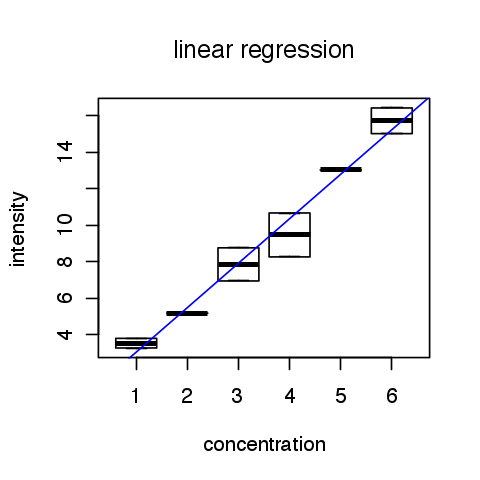

In [1296]:
fit.lm <- lm( A ~ conc, data=data.frame("conc"=as.numeric(data$conc), "A"=data$A) )
r1 <- lof(data$conc, data$A, fit.lm)

plot(data$conc,data$A, main="linear regression",ylab="intensity",xlab="concentration")
#lines(data$conc, fitted(fit.lm), col=2)
abline(fit.lm$coefficients[1],fit.lm$coefficients[2],col="blue")

We repeated the calculation for the A dataset, but this time we use ```lm()``` to fit the data. It means that we are not using the models from the book, but the one we are optimizing here. In addition we computed the p-value. A p-value higher than 0.05 means that we cannot conclude that our model doesn't fit our data acurrately.

We repeat the same calculation but this time we concatenate A and B datasets to see the effect of a larger dataset.

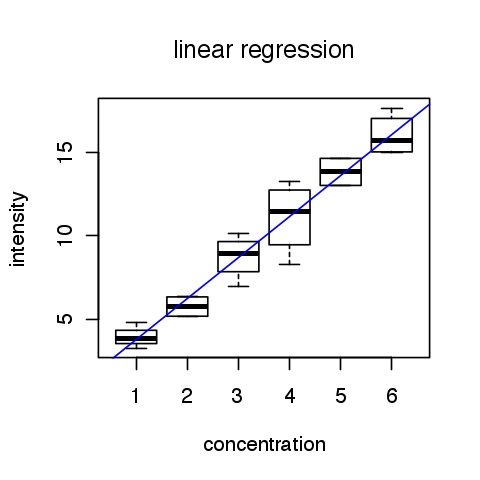

In [1297]:
fit.lm <- lm( A ~ conc, data=data.frame("conc"=as.numeric(c(data$conc,data$conc)), "A"=c(data$A, data$B)) )
r2 <- lof(c(data$conc,data$conc), c(data$A, data$B), fit.lm)

plot(as.factor(c(data$conc,data$conc)), c(data$A, data$B), main="linear regression",ylab="intensity",xlab="concentration")
abline(fit.lm$coefficients[1],fit.lm$coefficients[2],col="blue")

The next table shows the comparison. The first thing to note is that the degree of freedom is not changed because we added more points, but also more replicates. Maybe there are too many replicates in this case. The next thing to note is that the lack of fit is smaller which is good, but the MSR is larger. p-values for both are larger than 0.05 and we cannot rule out that our model is not accurate, which is ok. 

In [1298]:
tableOfResult2 <- cbind(r1,r2)
tableOfResult2

Number.Replicate,4,14
Number of Data,10,20
Number of Parameters,2,2
Degrees of Freedom,4,4
Sum Replicate,5.666,27.552
Sum Residual,8.371,28.237
Sum Total,1024.580,2370.373
Sum Predicted,1016.209,2342.137
Sum Lack Of Fit,2.706,0.685
Mean Residuals,1.046,1.569
Mean Total,102.458,118.519


##### Replicates

If we are curious to understand the effect of the replicates we can remove them and apply the test again. Clearly we will have no estimation of the experimental error to compare with. We can compute the LOF but we have no MRS to compute a p-value. 

<mark>Finally it is important to look at the coefficient. After all we are interested in a calibration curve, how the different experimental designs affect the value of the coefficients?</mark>

Number.Replicate,0
Number of Data,4
Number of Parameters,2
Degrees of Freedom,2
Sum Replicate,0
Sum Residual,6.486
Sum Total,425.645
Sum Predicted,419.159
Sum Lack Of Fit,6.486
Mean Residuals,3.243
Mean Total,106.411


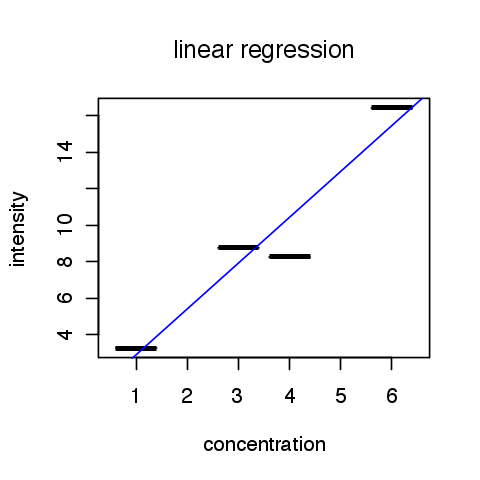

In [1299]:
F <- duplicated(data$conc)
fit.lm <- lm( A ~ conc, data=data.frame("conc"=as.numeric(data$conc[F]), "A"=data$A[F]) )
lof(data$conc[F], data$A[F], fit.lm)

plot(data$conc[F], data$A[F], main="linear regression",ylab="intensity",xlab="concentration")
abline(fit.lm$coefficients[1],fit.lm$coefficients[2],col="blue")


### p-values, model and noise

As already mentionned, the p-value can be used to decide if we can conclude that our model is not appropriate. We can go back to the data of the first example to check demonstrate how p-value help us decide if our model is accurate or not and to illustrate the effect of noise in the data.

In [1338]:
N <- 20 # we define the number of observations

# we create a fake dataset using a quadratic
#equation and adding some noise
# first create a vector of x repeated rep times
rep <- 2 # number of replicates
X <- rep(seq(from=43, to=96, length.out=N),rep)
# then create the Y vector according to the equation:
Y <- (0.075 * X + -1.874 + 0.01* X^2)
# create some noise
noise <-runif(length(Y), -1, 1) 
# add some noise to Y
Y <- Y + 1*noise
x_sorted <- sort(X,index.return=TRUE)
x <-x_sorted$x
y <- Y[x_sorted$ix]
data <- data.frame("x"=x, "y"=y, x2=x^2)

# we fit the data and evaluate the goodness of it
fit.lm <- lm( y ~ x, data=data )
noQuadLowNoise <- lof(data$x, data$y, fit.lm)

[1] 0.989

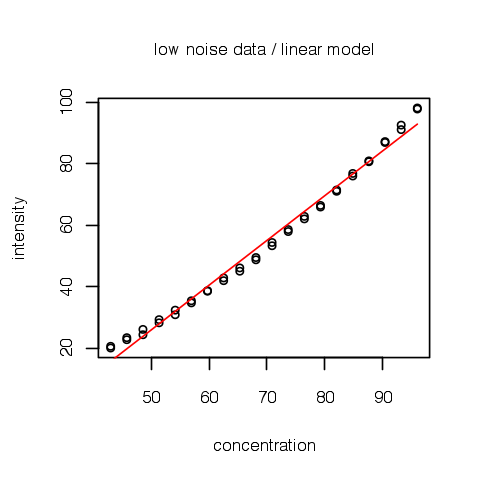

In [1339]:
plot(data$x,data$y, cex=0.7, cex.axis=0.8, cex.main=0.8, cex.lab=0.8, main="low noise data / linear model", xlab="concentration", ylab="intensity")
lines(data$x, fitted(fit.lm), col=2)
noQuadLowNoise[17]

Although the correlation coefficient is high, we can see that there is a trend in the data that is not correctly described by the model, the model is linear and we know that there is a quadratic term in the data. If we only look at the lack of fit and at the correlation coefficient we can conclude that the model is not bad. 

However the LOF is bigger than the MSR, which indicates a problem with our model. If we compute the p-value

In [1340]:
noQuadLowNoise[16] # p-value

[1] 1.081773e-11

In [1341]:
# Brereton p.42
qf(0.95,noQuadLowNoise[4],noQuadLowNoise[1])  # this would be the F-ratio for 95% confidence.
# above this number we can conclude with 95% confidence that intercept is useful.
noQuadLowNoise[15]
pf(noQuadLowNoise[15],noQuadLowNoise[4],noQuadLowNoise[1],lower.tail = TRUE)

[1] 2.151124

[1] 33.647

[1] 1

[1] 0.8864012

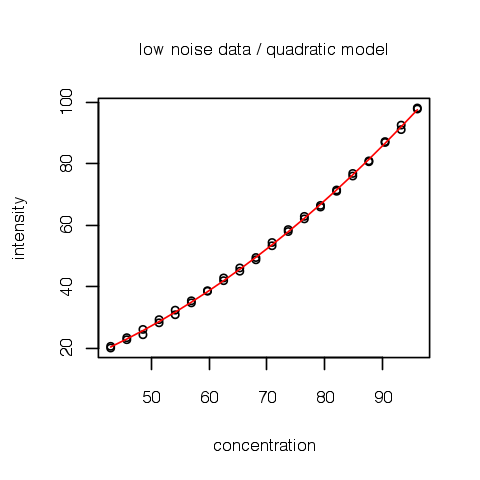

In [1342]:
fit.lm <- lm( y ~ x + x2, data=data )
QuadLowNoise <- lof(data$x, data$y, fit.lm)
plot(data$x,data$y, cex=0.7, cex.axis=0.8, cex.main=0.8, cex.lab=0.8, main="low noise data / quadratic model", xlab="concentration", ylab="intensity")
lines(data$x, fitted(fit.lm), col=2)
QuadLowNoise[16]

In [1343]:
# Brereton p.42
qf(0.95,QuadLowNoise[4],QuadLowNoise[1])  # this would be the F-ratio for 95% confidence.
# above this number we can conclude with 95% confidence that intercept is useful.
QuadLowNoise[15]
pf(QuadLowNoise[15],QuadLowNoise[4],QuadLowNoise[1],lower.tail = TRUE)

[1] 2.166701

[1] 0.68

[1] 0.2129488

Clearly the model is more accurate and we obtain a p-value that is larger than 0.05.

Now let's see what happens if the noise is large.

[1] 0.3563327

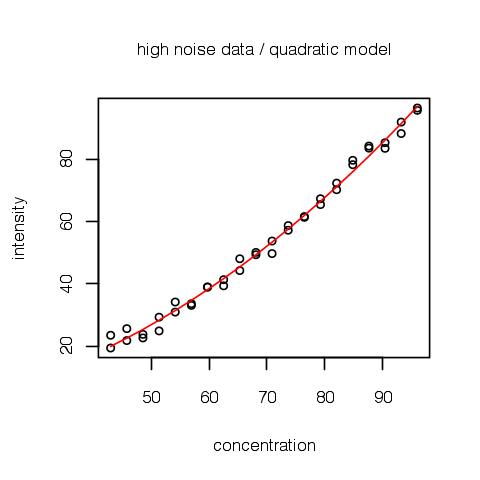

In [1344]:
N <- 20 
rep <- 2 
X <- rep(seq(from=43, to=96, length.out=N),rep)
Y <- (0.075 * X + -1.874 + 0.01* X^2)
noise <-runif(length(Y), -1, 1) 
Y <- Y + 4*noise # we increment the noise 
x_sorted <- sort(X,index.return=TRUE)
x <-x_sorted$x
y <- Y[x_sorted$ix]
data <- data.frame("x"=x, "y"=y, x2=x^2)

fit.lm <- lm( y ~ x + x2, data=data )
QuadHighNoise <- lof(data$x, data$y, fit.lm)

plot(data$x,data$y, cex=0.7, cex.axis=0.8, cex.main=0.8, cex.lab=0.8, main="high noise data / quadratic model", xlab="concentration", ylab="intensity")
lines(data$x, fitted(fit.lm), col=2)

QuadHighNoise[16]

In [1345]:
# Brereton p.42
qf(0.95,QuadHighNoise[4],QuadHighNoise[1])  # this would be the F-ratio for 95% confidence.
# above this number we can conclude with 95% confidence that intercept is useful.
QuadHighNoise[15]
pf(QuadHighNoise[15],QuadHighNoise[4],QuadHighNoise[1],lower.tail = TRUE)

[1] 2.166701

[1] 1.54

[1] 0.8231898

We repeat now the same operation but without the quadratic term.

[1] 0.0004152017

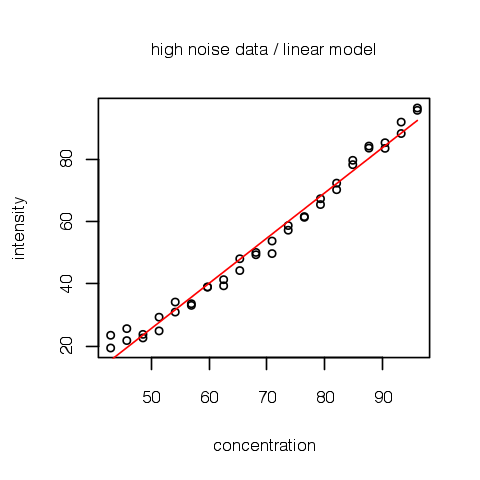

In [1346]:
fit.lm <- lm( y ~ x, data=data )
noQuadHighNoise <- lof(data$x, data$y, fit.lm)

plot(data$x,data$y, cex=0.7, cex.axis=0.8, cex.main=0.8, cex.lab=0.8, main="high noise data / linear model", xlab="concentration", ylab="intensity")
lines(data$x, fitted(fit.lm), col=2)

noQuadHighNoise[16]

In [1347]:
# Brereton p.42
qf(0.95,noQuadHighNoise[4],noQuadHighNoise[1])  # this would be the F-ratio for 95% confidence.
# above this number we can conclude with 95% confidence that intercept is useful.
noQuadHighNoise[15]
pf(noQuadHighNoise[15],noQuadHighNoise[4],noQuadHighNoise[1],lower.tail = TRUE)

[1] 2.151124

[1] 5.21

[1] 0.9996912

It can be observed than both p-values are larger than 0.05 and thus we cannot rule out a model and must **statistically** accept both model as acceptable for our data. This is the effect of noise, it increase the MSR resulting in larger p-values.

<mark>You may have to re-run the last cells several time, this because the data are generated randomly and the p-value may vary largely.</mark>

It may be interesting to plot the residual. Here we clearly distinguish the quadratic behavior that is not taken into account by our linear model. Plotting residual is always a good idea to help validating a model.

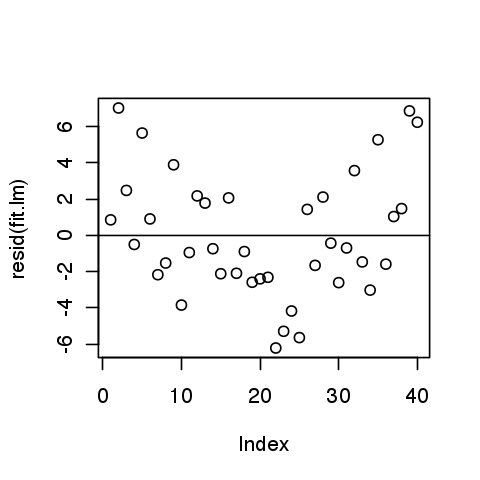

In [1315]:
plot( resid(fit.lm) )
abline(0,0)

Finally, we may want to add the 95% confidence interval for our calibration curve. This can be achieved with a single command.

In [1316]:
interval <- confint(fit.lm)
interval90 <- confint(fit.lm, level=0.8)

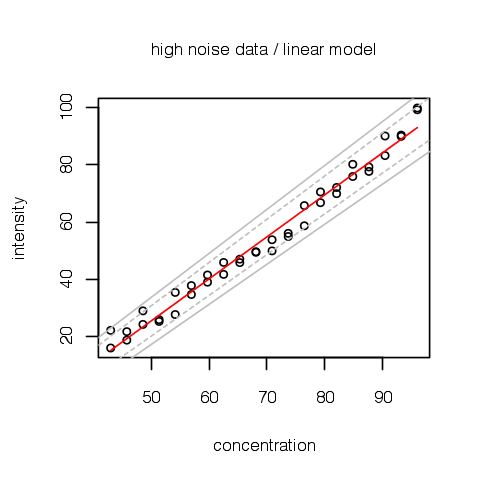

In [1317]:
plot(data$x,data$y, cex=0.7, cex.axis=0.8, cex.main=0.8, cex.lab=0.8, main="high noise data / linear model", xlab="concentration", ylab="intensity")
lines(data$x, fitted(fit.lm), col="red")
abline(interval[1,1], interval[2,1], col="gray")
abline(interval[1,2], interval[2,2], col="gray")
abline(interval90[1,1], interval90[2,1], col="gray", lty=2)
abline(interval90[1,2], interval90[2,2], col="gray", lty=2)

Here is a calibration curve with confidence interval at 80% (gray dashed line) and 95% (gray line). More concrete information can be found here for calibration curves (https://raw.githubusercontent.com/jwist/chemometrics/master/pdf/Calibration-curve-guide.pdf)

According to the decision tree, in this simple decision tree we have 1 IV (X, causes) and 1 DV (Y, effect). Since both are continuous variable we are in the domain of regression. Because we only have a single DV and it is continuous we speak about simple linear regression. In the next example we will study the effect of pH, temperature and concentration on the yield of a reaction, thus we will have more than one IV but a single DV and we speaks about multiple regression or multivariable regression.

for more about this read: http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518362/